<a href="https://colab.research.google.com/github/danidb29/Laboratorios-AnalisisDatos/blob/main/ProyectoInvestigacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
I avance proyecto de Introducción al Análisis de Datos. Universidad Nacional de Costa Rica

**Integrantes**

-Daniel Delgado Bernini
-Adrián Solís Matamoros
-Andrés Carvajal López
-Abraham Quesada Mora

"""

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv = pd.read_csv('spotify_top_music.csv')
csv

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [ ]:
df = pd.DataFrame(csv)
df = df.rename(columns={
    "bpm":"beats per minute",
    "nrgy":"energy",
    "dnce":"danceability",
    "dB":"decibels",
    "live":"liveness",
    "val":"valence",
    "dur":"duration in seconds",
    "acous":"acousticness",
    "spch":"speechiness",
    "pop":"popularity"
})

df

,title,artist,top genre,year,beats per minute,energy,danceability,decibels,liveness,valence,duration in seconds,acousticness,speechiness,popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [ ]:
#Función 1
#Búsqueda de la canción más popular por de un artista. Recibe un DataFrame y un artista por parámetro y devuelve la o las canciones más populares.
def cancionMasPopularArtista(df, artista):
  cancionesArtista = df.loc[(df['artist']==artista)]
  popularidadMax = cancionesArtista.popularity.max()
  cancion = cancionesArtista[cancionesArtista['popularity']==popularidadMax]
  return cancion[['title','artist', 'top genre','year']]

cancionMasPopularArtista(df, 'David Guetta')

,title,artist,top genre,popularity
104,Titanium (feat. Sia),David Guetta,dance pop,80


In [ ]:
#Función 2
#Búsqueda del artista con mas canciones por año. Recibe un DataFrame y año por parámetro, devuelve un diccionario con artista como llave y cantidad de canciones como valor.
def artistaMasPopular(df, annio):
  cancionesAnnio = df[df['year']==annio]
  cantCancionesArtista = cancionesAnnio['artist'].value_counts()
  maxCanciones = cantCancionesArtista.max()
  artistaTop = cantCancionesArtista[cantCancionesArtista == maxCanciones]
  return artistaTop.to_dict()

artistaMasPopular(df, 2015)

{'Justin Bieber': 9}

In [ ]:
#Función 3
#Búsqueda de las canciones de un artista a través de los años. Recibe un DataFrame y un artista por parámetro y devuelve un diccionario con items con año como llave y cantidad de canciones como valor.
def distribucionCancionesAnnioArtista(df, artista):
  cancionesArtista = df.loc[(df['artist']==artista)]
  cancionesAnnio = cancionesArtista['year'].value_counts()
  return cancionesAnnio

distribucionCancionesAnnioArtista(df, 'Katy Perry')

2011    3
2012    3
2014    3
2017    3
2010    2
2013    1
2015    1
2016    1
Name: year, dtype: int64

In [ ]:
#Función 4
#Búsqueda del género menos repetido. Recibe un DataFrame y devueve el o los géneros menos populares.
def generoMenosPopular(df):
  generoMenosRepetido = df['top genre'].value_counts()
  cantidad_menos_repetida = generoMenosRepetido.min()
  generoMenosRepetido = generoMenosRepetido[generoMenosRepetido == cantidad_menos_repetida]
  return generoMenosRepetido

generoMenosPopular(df)

celtic rock                1
moroccan pop               1
contemporary country       1
chicago rap                1
electro house              1
australian hip hop         1
canadian latin             1
house                      1
danish pop                 1
french indie pop           1
alaska indie               1
irish singer-songwriter    1
hollywood                  1
metropopolis               1
alternative r&b            1
Name: top genre, dtype: int64

In [ ]:
#Función 5
#Muestra un dato estadistico por columna y artista
def estadisticaSobreColumna(df,estadistica,columna,artista):
  try:
    pd.to_numeric(df[columna])
    is_numeric = True;
  except ValueError:
    is_numeric = False

  if not is_numeric and estadistica != 'moda':
    print(f"La columna '{columna}' no es numerica")
    return

  datosArtista = df.loc[(df['artist']==artista)][columna]

  if(estadistica == 'prom'):
    return datosArtista.mean()
  if(estadistica == 'median'):
    return datosArtista.median()
  if(estadistica == 'moda'):
    return datosArtista.mode()
  if(estadistica == 'desv'):
    return datosArtista.std()
  if(estadistica == 'var'):
    return datosArtista.var()
  if(estadistica == 'coRela'):
    return datosArtista.corr()



estadisticaSobreColumna(df,'var','popularity', 'Bruno Mars')



126.66666666666667

In [ ]:
#Función 6
#Canciones mayores a 5 minutos. Recibe un DataFrame y devuelve las canciones con su duración en segundos como valor que este sea mayor a 300, en forma de lista.
def cancionesMayoresA5minutos(df):
    canciones_largas = df[df['duration in seconds']>300][['title', 'duration in seconds']]
    return canciones_largas

cancionesMayoresA5minutos(df)

,title,duration in seconds
17,The Time (Dirty Bit),308
48,Castle Walls (feat. Christina Aguilera),329
63,Monster,379
76,The Edge Of Glory,321
81,You And I,307
95,Castle Walls (feat. Christina Aguilera),329
162,Lose Yourself to Dance,354
172,Suit & Tie,326
188,TKO,424
194,Take Back the Night,353


In [ ]:
#Función 7
#Cantidad de canciones por cada género. Recibe un DataFrame y devuelve la cantidad de canciones de cada género como valor entre llaves.
def cantidadGenero(df):
  cancionGenero = df['top genre'].value_counts()
  return cancionGenero

cantidadGenero(df)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
brostep                        2
downtempo                      2
electronic trap                2
belgian edm                    2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2
detroit hi

In [ ]:
#Función 8: Muestra las 10 canciones mas populares en general
def top_10_Canciones_mas_populares(df):
    top_10 = df[['title', 'artist', 'popularity', 'year']]
    return top_10.sort_values(by='popularity', ascending=False).head(10)

top_10_Canciones_mas_populares(df)

,title,artist,popularity,year
572,Memories,Maroon 5,99,2019
573,Lose You To Love Me,Selena Gomez,97,2019
574,Someone You Loved,Lewis Capaldi,96,2019
575,Señorita,Shawn Mendes,95,2019
576,How Do You Sleep?,Sam Smith,93,2019
578,Trampoline (with ZAYN),SHAED,92,2019
577,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,92,2019
580,Truth Hurts,Lizzo,90,2019
581,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,90,2019
579,Happier,Marshmello,90,2019


In [ ]:
#Función 9: Muestra las 10 canciones MÁS populares con sus decibeles, sea hará un analisis posterior para
#verificar si existe una correlación entre la popularidad y los decibeles. Realizar correlacion
def top_10_Canciones_mas_populares(df):
    top_10 = df[['title', 'popularity', 'decibels']]
    return top_10.sort_values(by='popularity', ascending=False).head(10)

top_10_Canciones_mas_populares(df)

,title,popularity,decibels
572,Memories,99,-7
573,Lose You To Love Me,97,-9
574,Someone You Loved,96,-6
575,Señorita,95,-6
576,How Do You Sleep?,93,-5
578,Trampoline (with ZAYN),92,-6
577,South of the Border (feat. Camila Cabello & Ca...,92,-6
580,Truth Hurts,90,-3
581,Good as Hell (feat. Ariana Grande) - Remix,90,-3
579,Happier,90,-3


In [ ]:
print("El promedio de decibeles en las canciones más populares es de:",top_10_Canciones_mas_populares(df)['decibels'].mean())

El promedio de decibeles en las canciones más populares es de: -5.4


In [ ]:
#Función 10: Muestra las 10 canciones MENOS populares con sus decibeles, sea hará un analisis posterior para
#verificar si existe una correlación entre la popularidad y los dicibeles
def top_10_Canciones_menos_populares(df):
    top_10 = df[['title', 'popularity', 'decibels']]
    return top_10.sort_values(by='popularity', ascending=False).tail(10)

top_10_Canciones_menos_populares(df)


,title,popularity,decibels
101,Last Friday Night (T.G.I.F.),27,-4
102,Firework,25,-5
441,Behind Your Back,18,-10
361,Dangerous,18,-5
103,Muny - Album Version (Edited),7,-5
50,Hello,0,-3
362,L.A.LOVE (la la),0,-8
442,Million Years Ago,0,-60
138,Blow Me (One Last Kiss),0,-3
267,Not a Bad Thing,0,-6


In [ ]:
print("El promedio de decibeles en las canciones menos populares es de:",top_10_Canciones_menos_populares(df)['decibels'].mean())

El promedio de decibeles en las canciones menos populares es de: -10.9


In [ ]:
# Funcion 11: Esta funcion calcula la correlacion entre 2 columnas de un DataFrame

def calcular_correlacion(df, variable1, variable2):

    correlation = df[variable1].corr(df[variable2])
    return correlation

print("Valor de la correlacion entre las 10 canciones mas populares y sus decibeles:",calcular_correlacion(top_10_Canciones_mas_populares(df),'popularity', 'decibels'))
print("Valor de la correlacion entre las 10 canciones menos populares y sus decibeles:",calcular_correlacion(top_10_Canciones_menos_populares(df),'popularity', 'decibels'))

Valor de la correlacion entre las 10 canciones mas populares y sus decibeles: -0.8407427574317637
Valor de la correlacion entre las 10 canciones menos populares y sus decibeles: 0.2814305860092107


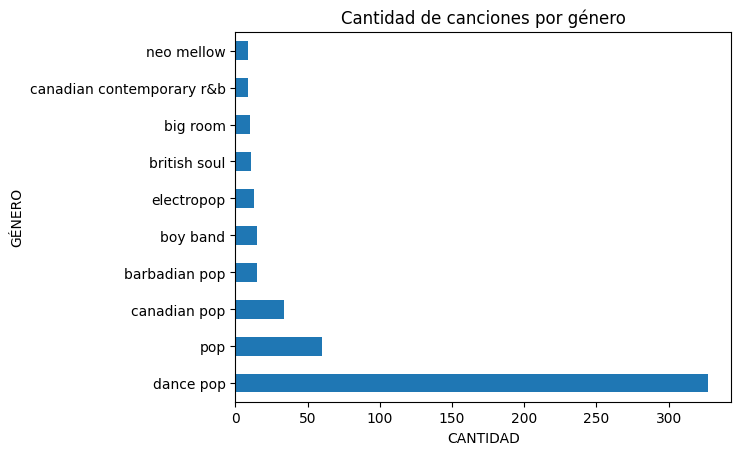

In [ ]:
#Gráficos

canciones_genero = cantidadGenero(df)
canciones_genero.head(10).plot.barh()
plt.ylabel('GÉNERO')
plt.xlabel('CANTIDAD')
plt.title('Cantidad de canciones por género')
plt.show()

Fuente: Elaboración propia.

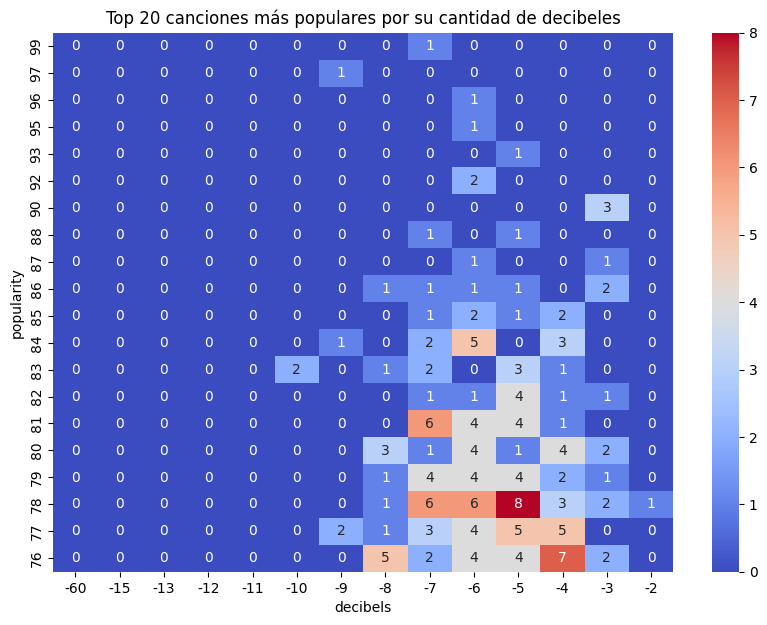

<Figure size 640x480 with 0 Axes>

In [ ]:
cont_table = pd.crosstab(df['popularity'], df['decibels'])
cont_table = cont_table.sort_values(by='popularity', ascending=False).head(20)
plt.figure(figsize=(10, 7))
sns.heatmap(cont_table, annot=True, cmap='coolwarm')

plt.title("Top 20 canciones más populares por su cantidad de decibeles")
plt.show()


Fuente: Elaboración propia.

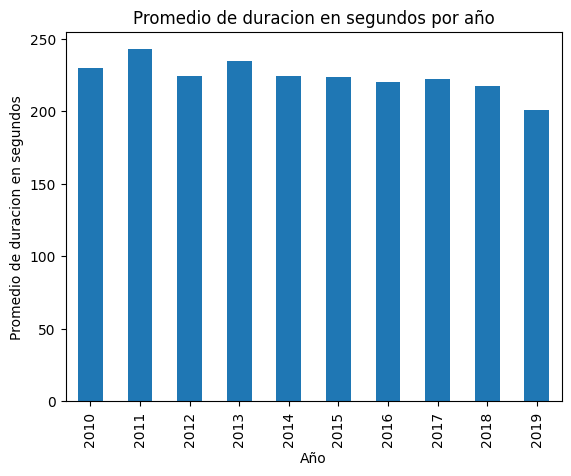

In [ ]:
promedio_annio_duracion = df.groupby('year')['duration in seconds'].mean()
promedio_annio_duracion.plot.bar()
plt.ylabel('Promedio de duracion en segundos')
plt.xlabel('Año')
plt.title('Promedio de duracion en segundos por año')
plt.savefig("barras.pdf")
plt.show()

Fuente: Elaboración propia.

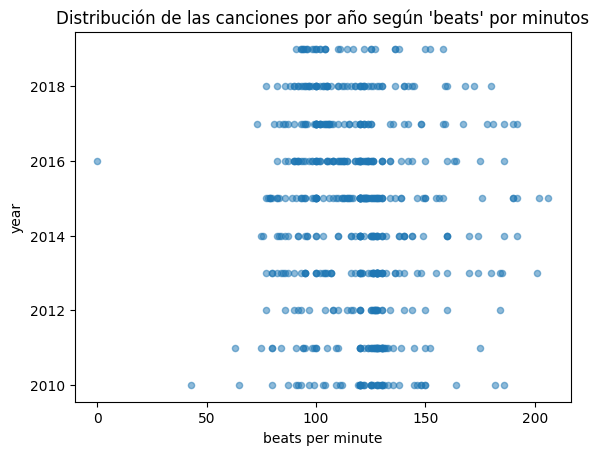

In [ ]:
df.plot.scatter(x='beats per minute', y='year', alpha=0.5)
plt.title("Distribución de las canciones por año según 'beats' por minutos")
plt.show()

Fuente: Elaboración propia.

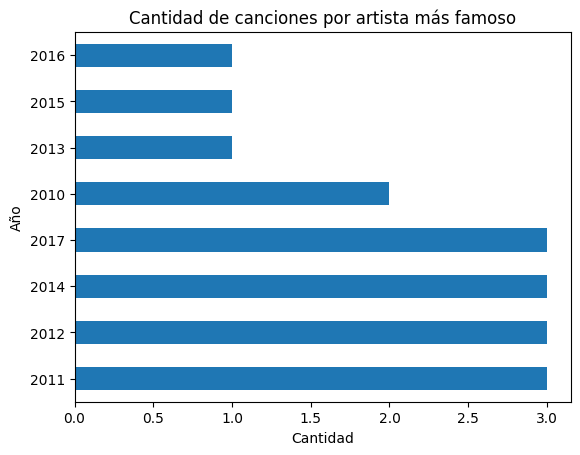

,title,artist,top genre,year,beats per minute,energy,danceability,decibels,liveness,valence,duration in seconds,acousticness,speechiness,popularity


In [ ]:
distribucionCancionesAnnioArtista(df, 'Katy Perry').plot.barh()
plt.title('Cantidad de canciones por artista más famoso')
plt.ylabel('Año')
plt.xlabel('Cantidad')
plt.show()


Fuente: Elaboración propia.